# Homework 1: Data Cleaning and Exploratory Data Analysis 
***

**Name**: 

***

This assignment is due on Moodle by **5pm on Friday September 14th**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.   

**NOTES**: 

- Unless a url is given for a data set, you will find the required data in the same directory as this assignment on GitHub.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Piazza on writing math in Markdown. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

### Problem 1 
***

Rebecca cares about [octopuses](https://english.stackexchange.com/questions/270/what-is-the-correct-plural-of-octopus/271). She cares so much that, up and down the coast, she opens octopus rescues, octopus temporary housing, and octopus sanctuaries, specifically targeted at juveniles in need. For convenience, we will refer to all the Juvenile Octopus Rescues, Temps, and Sanctuaries as "JORTS."

Rebecca wants to estimate the average food consumption across the JORTS this month so that she can plan the food orders for next month. She has 14 Rescues, 35 Temporary houses, and 56 Sanctuaries. What an empire!

Rebecca opens up the *JORTS Manager App* on her phone, which gives her a list of all of her coastal operations. She randomly picks 15 of them, and gets ready to email their managers asking for the monthly food reports. Of course, Rebecca has taken CSCI 3022, so she knows a thing or two about sampling, and so, to get a good estimate of the monthly food consumption (kilograms per month) for typical JORTS, she intentionally chooses 2 Rescues, 5 Temporary houses, and 8 Sanctuaries.

Identify the following: 

- the population 
- the sample frame 
- the sample 
- the type of sample 
- the quantity of interest 

the population is **all of her coastal operations**. 
the sample frame is **the list of all her coastal operations**; this is the frame from which she draws the sample. 
the sample is **2 Rescues, 5 Temporary Houses and 8 Sanctuaries.** 
the type of sample is **a stratified random sample of size n = 15 broken into the categories {rescues, temporary, houses, and sancuaries}**, she stratifies based on the type of operation to try to make her sample more evenly distributed in the characteristics of her population.
the quantity of interest is **the average food consumption across the JORTS this month.** 

### Problem 2 
***

A method to investigate the sensitivity of the sample mean and the sample median to extreme outliers and changes in the dataset is to replace one or more elements in a given dataset by a number $y$ and investigate the eﬀect when $y$ changes. To illustrate this, consider the dataset

$$
4.6 \quad 
5.0 \quad
6.5 \quad
7.7 \quad
y \quad
4.2 \quad
1.9
$$

**Part A**: Compute the sample mean and sample median for $y=0$. Compute them both again for $y=10$.

In [10]:
def compute_sample_mean(Data, y):
    Data.append(y)
    d_sum = 0.0
    for d in Data:
        d_sum += d
    d_sum = d_sum / len(Data)
    return d_sum

def compute_sample_median(Data, y):
    Data.append(y)
    d_sorted = sorted(Data)
    length = len(d_sorted)
    n = length
    if length % 2 != 0:
        return d_sorted[int((n+1)/2)]
    else:
        return (d_sorted[int(n/2)] + d_sorted[int(n/2)+1]) / 2
Data = [4.6, 5.0, 6.5, 7.7, 4.2, 1.9]
y = 0
print("mean with y=0: ", compute_sample_mean(Data, y))
Data = Data[:len(Data)-1]
print("median with y=0: ",compute_sample_median(Data, y))
Data = Data[:len(Data)-1]
y = 10
print("mean with y=10: ",compute_sample_mean(Data, y))
Data = Data[:len(Data)-1]
print("median with y=10: ",compute_sample_median(Data, y))
Data = Data[:len(Data)-1]


mean with y=0:  4.271428571428571
median with y=0:  5.0
mean with y=10:  5.7
median with y=10:  6.5


**Part B**: What should $y$ be if we want the mean to be equal to $10$? What should $y$ be if we want the mean to be equal to $0$?

In [16]:
mean = 6.5
y=10
while mean < 10:
    mean = compute_sample_mean(Data, y)
    Data = Data[:len(Data)-1]
    y += 1

print("first value of y such that mean >= 10: ", y, " mean: ", mean)

mean = 6.5
y = 10
while mean > 0:
    mean = compute_sample_mean(Data, y)
    Data = Data[:len(Data)-1]
    y -= 1

print("first value of y such that mean <= 0: ", y, " mean: ", mean)

first value of y such that mean >= 10:  42  mean:  10.12857142857143
first value of y such that mean <= 0:  -31  mean:  -0.014285714285714488


**Part C**: Compute the sample median for the following cases: 
- $y=10$ 
- $y=100$ 
- $y \to \infty$ 
- $y=5.01$ 
- $y=4.99$

In [17]:
median = compute_sample_median(Data, 10)
Data = Data[:len(Data)-1]
print("median when y=10: ", median)
median = compute_sample_median(Data, 100)
Data = Data[:len(Data)-1]
print("median when y=100: ", median)
y = 100
partial_infinity = 9999999
while y < partial_infinity:
    median = compute_sample_median(Data, y)
    Data = Data[:len(Data)-1]
    y += 10
    
print("median when y --> infity: ", median)

median when y=10:  6.5
median when y=100:  6.5
median when y --> infity:  6.5


**Part D**: Think about the previous parts, above, and describe in words or mathematical notation the answers to the following two questions:

- By varying $y$, what is the set of all the possible values that the sample mean could take on?
- By varying $y$, what is the set of all the possible values that the sample median could take on?

by varying *y* the set of all possible means is [-infinity to infinity] this is because the mean is a weighted average of all the items in the list, so as y approaches positive or negative infinity so does the mean, this is because in comparison to infinity the other terms in the means calculation are literally insignificant. 

by varying *y* the set of all possible medians is {6.5} this is because the median is essentially an index calculation and so extreme values added to the list will never do any more than have the effect of shifting n+1 and flipping the parity of n in the index calculation that the median relies on. 

### Problem 3 
***

Let $x_1, x_2, \ldots, x_n$ be $n$ observations of a variable of interest.  Recall that the sample mean $\bar{x}_n$ and sample variance $s^2_n$ are given by 

$$
\bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k \quad \textrm{and} \quad s^2_n = \frac{1}{n-1}\sum_{k=1}^n \left( x_k - \bar{x}_n\right)^2
$$

where here the subscript $n$'s indicate the number of observations in the sample. Notice that a natural computation of the variance requires two passes over the data: one to compute the mean, and a second to subtract the mean from each observation and compute the sum of squares. It is often useful to be able to compute the variance in a single pass, inspecting each value $x_k$ only once; for example, when the data are being collected without enough storage to keep all the values, or when costs of memory access dominate those of computation. In this problem you will explore two methods for such an _online_ computation of the mean and variance.  

**Part A**: Show algebraically that the following relation holds between the mean of the first $n-1$ observations and the mean of all $n$ observations: 

$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$

**Part B**: Write a function `my_sample_mean` that takes as its input a numpy array and returns the mean of that numpy array using the formulas from class (written above). You may *not* use numpy's built in mean function. Write another function `my_sample_var` that takes as its input a numpy array and returns the variance of that numpy array, again using the formulas from class (written above). You may *not* use any built-in sample variance functions.

In [19]:
def my_sample_mean(sample):
    m_sum = 0
    for s in sample:
        m_sum += s
    return (m_sum / len(sample))

def my_sample_variance(sample):
        s_mean = my_sample_mean(sample)
        vari = 0
        for j in sample:
            vari += ((s_mean - j)**2)
        return vari / (len(sample)-1)

**Part C**: Use your functions from Part B to compute the sample mean and sample variance of the following array, which contains the counts of perfectly round suckers found on a set of aquarium octopuses.

`octopus_suckers = [25, 29, 40, 19, 7, 6, 3, 11, 19, 21, 22, 45, 27]`

In [20]:
octopus_suckers = [25, 29, 40, 19, 7, 6, 3, 11, 19, 21, 22, 45, 27]
print(my_sample_mean(octopus_suckers))
print(my_sample_variance(octopus_suckers))

21.076923076923077
158.91025641025644


**Part D**: Implement a third function called `update_mean` that implements the formula whose valdity you proved in Part A. (Note: this function will need to take as its input three things: $x_n$, $\bar{x}_{n-1}$ and $n$.)

Use this function to compute the values that you get from taking the mean of the first suckers count, the first two suckers counts, the first three suckers counts, and so on up to all the suckers counts. Store your means in a numpy array called `sucker_means`.

### Problem 4
*** 
Some claim that the final hours aboard the RMS Titanic were marked by "class warfare" in which the people with first-class tickets took all the good spots on the lifeboats; others claim that the final hours were characterized by male chivalry, in which the men valiantly gave up their positions in the boats and succumbed bravely to the depths of the Atlantic. 

We have the data on survival rates by class and by sex, so let's figure out whether there is evidence for these scenarios. Access the titanic data in `titanic_data.csv` and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival of passengers (**Survived**), and gender (**Sex**), among others.  

In [2]:
import pandas as pd
df = pd.read_csv("titanic_data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part A**: Consider the two claims: class warfare, and male chivalry. Suppose that class warfare occurred in the final hours aboard the Titanic.  What patterns might you expect to see in the data?  Suppose that male chivalry was widespread during the final hours insteas. What patterns might you then expect to see in the data?  Explain both of these hypothesized patterns in words. Are these two hypotheses mutually exclusive or not?

if class warfare played out, we might expect to see that the rich survived and the poor did not. In more mathematical terms class warfare would show up in correlation between the survived variable and the Fare price that that person payed. We could drill down even more and say that we expect that the mean fare for a survivor would be significantly higher than the mean fare for someone who died. If we saw chivalry truly play out then we would see a higher probability that someone was female given that they survived. No they are not mutually exclusive, both patterns could be present in the data at the same time. 

**Part B**: Create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. 

In [2]:
import pandas as pd
df1 = pd.read_csv("titanic_data.csv")
df1.dropna(subset=["Survived"])
df1.dropna(subset=["Pclass"])
df1.dropna(subset=["Age"])
df1.dropna(subset=["Sex"])

dfTitanic = df1
        

**Part C**: Determine the fraction of survivors from each passenger class. 

In [4]:
num_survived = len(dfTitanic[dfTitanic["Survived"] == 1])
print("number of survived: ", num_survived)
num_died = len(dfTitanic[dfTitanic["Survived"] == 0])
print("num died: ", num_died)
frac_survived = num_survived / (num_died + num_survived)
frac_died = 1 - frac_survived
print("frac_survived: ", frac_survived, ", frac died: ", frac_died)

number of survived:  350
num died:  541
frac_survived:  0.39281705948372614 , frac died:  0.6071829405162739


**Part D**: Compute the fraction of survivors according to class and gender.  Did men in first class or women in third class have a higher survival rate? 

In [12]:
num_men_survived = len(dfTitanic[(dfTitanic["Survived"] == 1) & (dfTitanic["Sex"] == "male")])
num_women_survived = len(dfTitanic[(dfTitanic["Survived"] == 1) & (dfTitanic["Sex"] == "female")])
nms_first_class = len(dfTitanic[(dfTitanic["Survived"] == 1) & (dfTitanic["Sex"] == "male") & (dfTitanic["Pclass"] == 1)])
nmd_first_class = len(dfTitanic[(dfTitanic["Survived"] == 0) & (dfTitanic["Sex"] == "male") & (dfTitanic["Pclass"] == 1)])
nws_third_class = len(dfTitanic[(dfTitanic["Survived"] == 1) & (dfTitanic["Sex"] == "female") & (dfTitanic["Pclass"] == 3)])
nwd_third_class = len(dfTitanic[(dfTitanic["Survived"] == 0) & (dfTitanic["Sex"] == "female") & dfTitanic["Pclass"] == 3])


print("men in first class survived at a rate of: ", nms_first_class / (nms_first_class + nmd_first_class))
print("women in third class survived at a rate of: ", nws_third_class / (nws_third_class + nwd_third_class))
print("num women surv. third: ", nws_third_class, " and the num women died third: ", nwd_third_class)
print("num men surv first: ", nms_first_class, " and the num mend died first: ", nmd_first_class)
#as we can see, it is actually the case that men in first class died at a greater rate than women in third class. 
#this suggests that something more like chivalry played out than class or gender warfare.

men in first class survived at a rate of:  0.3770491803278688
women in third class survived at a rate of:  1.0
num women surv. third:  74  and the num women died third:  0
num men surv first:  46  and the num mend died first:  76


**Part E**: How would you characterize the distribution of **AGE**? (By _characterize_ we mean that you should indicate whether the data are unimodal, bimodal, multimodal, symmetric, negatively skewed, positively skewed, etc.)  Make any necessary graphical summaries to justify your conclusion. 

Text(0,0.5,'counts')

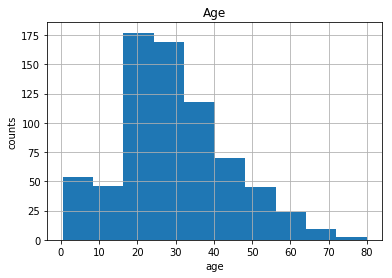

In [109]:
import numpy as np
import matplotlib.pyplot as plt
dfTitanic.hist(column='Age')
plt.xlabel("age")
plt.ylabel("counts")
#the data looks unimodal, I would describe the age of passengers as skewed to the right, meaning the datas mean is skewed 
#towards older passengers. 

**Part F**: Were the median and mean ages for females who survived higher or lower than for females who did not survive?  

In [108]:
sum_age = 0
dfFemalesSurv = dfTitanic[(dfTitanic["Sex"]=="female") & (dfTitanic["Survived"]==1)]
dfFemalesDied = dfTitanic[(dfTitanic["Sex"]=="female") & (dfTitanic["Survived"]==0)]
print("mean age of female who survived: ", dfFemalesSurv["Age"].mean())
print("mean age of female who died: ", dfFemalesDied["Age"].mean())
print("median age of female who survived: ", dfFemalesSurv["Age"].median())
print("median age of female who died: ", dfFemalesDied["Age"].median())


#the mean are within += 1 from eachother, the medians are within 3 years. However both the mean and median age of female who died is slightly 
#older than for females that died, this implies the young had an advantage. 

mean age of female who survived:  28.40558510638298
mean age of female who died:  28.922063492063494
median age of female who survived:  26.0
median age of female who died:  29.0


**Part G**: Do the data suggest class warfare, male chivalry, or some combination of both characteristics in the final hours aboard the Titanic?  Justify your conclusion based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusion. 

The data suggests that some level of male chivalry played out given the stark difference in survival rates between first class men and third class women. This suggest a ladies get saved first mindset was in effect on the ship. It also suggests that younger people may have had an advantage in escaping but *not* that class warfare played out.

### Problem 5 - No arm in another tentacle problem, eh?
***

_Octopuses have eight arms, which are often called tentacles._ 

While technically a fact about the noble octopus, this doesn't really do much for the imagination. Go find another octopus fact that you think is cool *and* that you think no one else is likely to report! In fact, *if your fact is unique, you'll earn extra credit on this problem*! Submit your fact [here](https://docs.google.com/forms/d/e/1FAIpQLScjminsyl9Q1d_OswAXHNLKPj9Gu-00qhVsy07VYDZC8d36LQ/viewform?usp=sf_link).

### Problem 6 - Dirty Data
***
Access the data from url https://www.stat.berkeley.edu/~statlabs/data/babies.data and store the information in a Pandas DataFrame.  A description of the variables can be found at https://www.stat.berkeley.edu/~statlabs/labs.html.  These data are a subset from a much larger study dealing with child health and development. 


In [81]:
df = pd.read_csv("https://www.stat.berkeley.edu/~statlabs/data/babies.data", delim_whitespace=True)
df.head(10)

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,123,999,0,36,69,190,0
4,108,282,0,23,67,125,1
5,136,286,0,25,62,93,0
6,138,244,0,33,62,178,0
7,132,245,0,23,65,140,0
8,120,289,0,25,62,125,0
9,143,299,0,30,66,136,1



**Part A**: Create a clean data set that removes subjects if any observations on the subject are unknown.  Note that that collectors of the data set used values like $9$, $99$, $999$, to denote unknown values.  You can look at the documentation linked in the problem description to determine which unknown-value marker was used for each characteristics.  Store the modified data set in a Pandas DataFrame called dfBabies. 

In [ ]:
df.dropna(subset=["bwt"])
df.dropna(subset=["gestation"])
df.dropna(subset=["parity"])
df.dropna(subset=["age"])
df.dropna(subset=["height"])
df.dropna(subset=["weight"])
df.dropna(subset=["smoke"])

**Part B**: Use the information in dfBabies to create a density histogram of the birth weights of babies whose mothers have never smoked (smoke=0) and another histogram placed directly below the first in the same graphics device for the birth weights of babies whose mothers currently smoke (smoke=1).  Make the range of the horizontal axis $30$ to $180$ (ounces) for both histograms.  Make sure to give each subplot titles and label axes. 

Text(0,0.5,'densities')

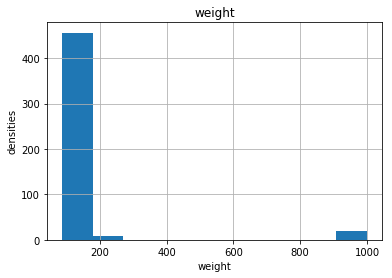

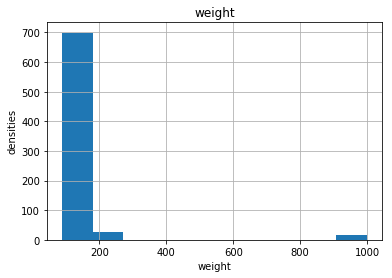

In [111]:
#here I create two histograms and label the axis.
dfBabySmoke = df[(df['smoke'] == 1)]
dfBabyClear = df[(df['smoke'] == 0)]
dfBabySmoke.hist(column='weight')
plt.xlabel("weight")
plt.ylabel("densities")
dfBabyClear.hist(column='weight')
plt.xlabel("weight")
plt.ylabel("densities")

**Part C**: Based on the histograms in **Part B**, characterize the distribution of baby birth weights for both non-smoking and smoking mothers. 

both distributions are uni-modal with a concentration of data near the mean, and with a small number of extreme outliers. 

**Part D**: What are the mean and median weight difference between babies of smokers and non-smokers?  Can you think of any reason not to use the mean as a measure of center to compare birth weights for this problem? 

In [88]:
print(dfBabySmoke['weight'].mean(), dfBabySmoke['weight'].median())
print(dfBabyClear['weight'].mean(), dfBabyClear['weight'].median())
#as we can see from the visual these graphs are heavily skewed right so we may want to consider the medians as the more accurate mesaure
#this is because the mean is being pulled right by outliers. 

161.06198347107437 125.0
149.55390835579516 127.0


**Part E**: Create side-by-side box-and-whisker plots to compare the birth weights of babies whose mothers never smoked and those who currently smoke.  Use the box-and-whisker plot conventions discussed in lecture. 

Text(0,0.5,' weights')

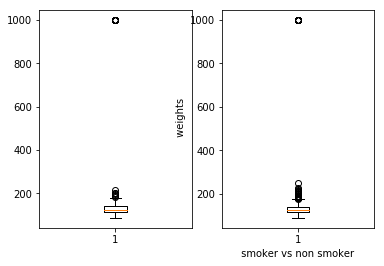

In [120]:
plot1, axs = plt.subplots(1, 2)
axs[0].boxplot(dfBabySmoke['weight'])

axs[1].boxplot(dfBabyClear['weight'])
plt.xlabel(" smoker vs non smoker ")
plt.ylabel(" weights")

**Part F**: Using the box-and-whisker plots from **Part E** comment on the distributions of body weights of babies within each smoking / non-smoking groups as well as the comparison of the two classes. 

The babies from moms who smoke has slightly greater mean weight, and slightly lower median weight, suggesting a greater standard deviation in weight. 

### Challenge Problem
***

In every homework assignment we'll give you a Challenge Problem.  Challenge Problems never need to be turned in (and in fact, will not be graded) but we encourage you to give them a shot (after completing the required homework problems) and discuss them with your classmates and your instructors.  

In the 1954 book _How to Lie with Statistics_ authors Darrell Huff and Irving Geis describe many common ways that people concoct misleading graphics.  An excerpt from these chapters can be found [here](https://piazza.com/class_profile/get_resource/j6pfvv6b9ze4gi/j771gy7fdpe3e7).  

Your job is to go out onto the web and find some data that you find interesting.  Then create both a misleading and a non-misleading version of a graphical summary for the data. 